In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from PIL import Image, ImageOps
import numpy as np

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

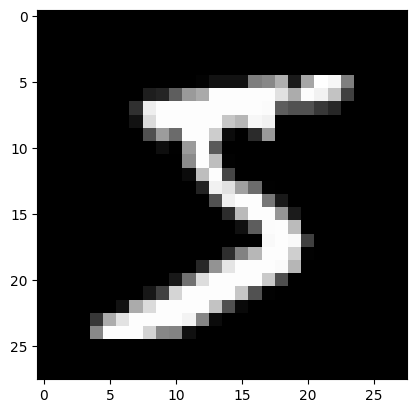

In [4]:
# Display the first image in the training dataset
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [5]:
# Build the model
model = Sequential([
 Flatten(input_shape=(28, 28)),
 Dense(128, activation='relu'),
 Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])


C:\Users\A.JASWANTH\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Train the model
model.fit(x_train, y_train, epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8753 - loss: 0.4392
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9653 - loss: 0.1166
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9778 - loss: 0.0749
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9830 - loss: 0.0573
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9863 - loss: 0.0438
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9904 - loss: 0.0317
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9919 - loss: 0.0272
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9939 - loss: 0.0201
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9951 - loss: 0.0158
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9960 - loss: 0.0139


In [7]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.9725 - loss: 0.0963
Accuracy: 97.75%


In [8]:
# Function to preprocess the image
def preprocess_image(image_path):
 img = Image.open(image_path).convert('L')
 img = ImageOps.invert(img)
 img = img.resize((28, 28))
 img = np.array(img) / 255.0
 img = img.reshape(1, 28, 28)
 return img


In [9]:
# Path to the handwritten digit image
image_path = 'digit.png'
new_image = preprocess_image(image_path)


In [10]:
# Predict the digit
prediction = model.predict(new_image)
predicted_digit = np.argmax(prediction)
print(f"Predicted Digit: {predicted_digit}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted Digit: 5


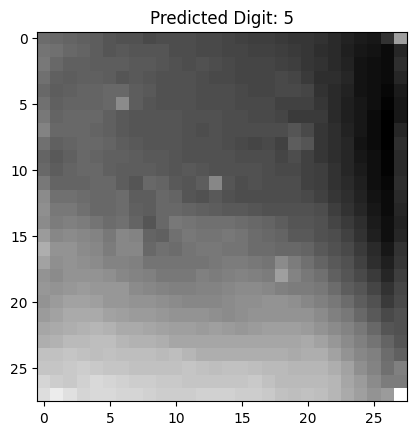

In [11]:
# Display the test image and the predicted digit
plt.imshow(new_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.show()
